# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
from scipy import stats

# Para dividir aleatoriamente la base de datos en Train y Test
from sklearn.model_selection import train_test_split

# Para fijar la semilla aleatoria
from sklearn.pipeline import make_pipeline

# Para normalizar
from sklearn.preprocessing import StandardScaler

# Para predecir la variable objetivo, mediante modelos lineales de clasificación
from sklearn.linear_model import SGDClassifier

# Métricas: Para evaluar los conjuntos de datos (Train y Test)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)

# Para ver la grilla
from sklearn.model_selection import (ParameterGrid, GridSearchCV)

# Para calcular el árbol de decisión
from sklearn.tree import DecisionTreeClassifier

# para dibujar el árbol
from sklearn.tree import plot_tree

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

In [3]:
dataset[:5]

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [4]:
dataset.shape

(1854, 11)

**RESPUESTAS:**     

**1.1** El conjunto de datos **HMEQ** pertenece a datos relevados por el departamento de créditos de un banco. Contiene información sobre el rendimiento de 1.854 préstamos. El objetivo de este dataset es el de poder automatizar el proceso de selección de usuarios candidatos al crédito de viviendas. El conjunto de datos de Kaggle Home Equity está disponible en: https://www.kaggle.com/ajay1735/hmeq-data       

**1.2** Nuestra variable objetivo es **TARGET**. Es una variable binaria que indica si se cumple o nó con el préstamo (**1**= No se pagó el crédito; **0**= Se pagó el credito).

**1.3** El dataset cuenta con 10 atributos:    
* **1-LOAN:** Cantidad de dinero requerido en el préstamo.
* **2-MORTDUE:** Suma adeudada en la hipoteca existente.
* **3-VALUE:** Valor de la propiedad actual.
* **4-YOJ:** Años en el trabajo actual.
* **5-DEROG:** Número de informes negativos importantes.
* **6-DELINQ:** Número de líneas de crédito en mora.
* **7-CLAGE:** Edad de la línea comercial más antigua en meses.
* **8-NINQ:** Número de líneas de crédito recientes.
* **9-CLNO:** Número de líneas de crédito.
* **10-DEBTINC:** Relación Deuda/Ingreso.   

**1.4** Posiblemnete los atributos más determinantes sean **LOAN**, **MORTDUE**, **DELINQ**,**CLNO** y **DEBTINC**.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán **modelos lineales de clasificación** para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [5]:
#from sklearn.linear_model import SGDClassifier
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler

# Fijamos la semilla aleatoria, para que la división sea siempre repetible
modelo_SGDC = make_pipeline(StandardScaler(), SGDClassifier(random_state=0))

# Entrenamos el modelo
modelo_SGDC.fit(X_train, y_train)

# Obtenemos los valores predichos
y_test_pred = modelo_SGDC.predict(X_test)
y_train_pred = modelo_SGDC.predict(X_train)

In [6]:
# Evaluación sobre el conjunto de Train
print("REPORTE TRAIN")
print('Accuracy: %.3f'% accuracy_score(y_train, y_train_pred))
print('Precision: %.3f'% precision_score(y_train, y_train_pred))
print('Recall: %.3f'% recall_score(y_train, y_train_pred))
print('F1: %.3f'% f1_score(y_train, y_train_pred)) 

print('Matriz de Confusión TRAIN:')
confusion_matrix(y_train, y_train_pred)

REPORTE TRAIN
Accuracy: 0.873
Precision: 0.714
Recall: 0.418
F1: 0.528
Matriz de Confusión TRAIN:


array([[1190,   42],
       [ 146,  105]], dtype=int64)

In [7]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluación sobre el conjunto de Test
print("REPORTE TEST")
print('Accuracy: %.3f'% accuracy_score(y_test, y_test_pred))
print('Precision: %.3f'%precision_score(y_test, y_test_pred))
print('Recall: %.3f'%recall_score(y_test, y_test_pred))
print('F1: %.3f'%f1_score(y_test, y_test_pred)) 

print('Matriz de Confusión TEST:')
confusion_matrix(y_test, y_test_pred)

REPORTE TEST
Accuracy: 0.868
Precision: 0.645
Recall: 0.345
F1: 0.449
Matriz de Confusión TEST:


array([[302,  11],
       [ 38,  20]], dtype=int64)

### Ejercicio 2.2: Ajuste de Hiperparámetros

**A)** Seleccionar valores para los hiperparámetros principales del SGDClassifier. 
* Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.
* Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

**B)** Reportar accuracy promedio y varianza para todas las configuraciones.

**C)** Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [8]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import ParameterGrid

# A) Selección de Hiperparámetros: Grilla
param_grid = {
    "loss": ['hinge', "perceptron", "log"], # probamos diferentes funciones de loss
    "penalty":['l2', "l1", "elasticnet"], # diferentes penalizaciones
    "learning_rate" : ['constant','optimal','invscaling','adaptive'],
    "eta0" : [0.1,0.2,0.4,1],
    #"alpha": np.logspace(-5, 0, 6),
    }

In [9]:
# Modelo clasificador
#modelo_SGDC = make_pipeline(StandardScaler(), SGDClassifier(random_state=0)
modelo_SGDC_2 = SGDClassifier(random_state=0)

cv= GridSearchCV(modelo_SGDC_2, param_grid, scoring='accuracy', cv=3)

# Entrenamiento
cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=0),
             param_grid={'eta0': [0.1, 0.2, 0.4, 1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'perceptron', 'log'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [10]:
# B) Reporte de accuracy promedio y varianza para todas las configuraciones
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_penalty','param_eta0', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_loss,param_penalty,param_eta0,mean_test_score,std_test_score,rank_test_score
78,log,l2,0.4,0.830749,0.000884,1
124,log,l1,1,0.830749,0.000884,1
116,log,elasticnet,1,0.830749,0.000884,1
38,hinge,elasticnet,0.2,0.830749,0.000884,1
41,perceptron,elasticnet,0.2,0.830749,0.000884,1
16,log,l1,0.1,0.830749,0.000884,1
128,hinge,elasticnet,1,0.830749,0.000884,1
42,log,l2,0.2,0.830749,0.000884,1
111,perceptron,l2,1,0.830749,0.000884,1
108,hinge,l2,1,0.830749,0.000884,1


In [11]:
# Evaluación sobre el conjunto de Train y Test, de la la mejor configuración encontrada
df[df['rank_test_score']<2][['param_loss','param_penalty', 'param_eta0','param_learning_rate', 
                             'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_penalty,param_eta0,param_learning_rate,mean_test_score,std_test_score,rank_test_score
6,log,l2,0.1,constant,0.830749,0.000884,1
16,log,l1,0.1,optimal,0.830749,0.000884,1
26,log,elasticnet,0.1,invscaling,0.830749,0.000884,1
38,hinge,elasticnet,0.2,constant,0.830749,0.000884,1
41,perceptron,elasticnet,0.2,constant,0.830749,0.000884,1
42,log,l2,0.2,constant,0.830749,0.000884,1
52,log,l1,0.2,optimal,0.830749,0.000884,1
72,hinge,l2,0.4,constant,0.830749,0.000884,1
75,perceptron,l2,0.4,constant,0.830749,0.000884,1
78,log,l2,0.4,constant,0.830749,0.000884,1


In [12]:
best_model = cv.best_estimator_
best_model

SGDClassifier(eta0=0.1, learning_rate='constant', loss='log', random_state=0)

In [13]:
# Mejor modelo seleccionado
best_model_configuration= make_pipeline(StandardScaler(), SGDClassifier(eta0= 0.1, learning_rate='constant',loss='log',penalty='l2',random_state=0))

# Entrenamiento
best_model_configuration.fit(X_train, y_train)

# Predichos
y_test_pred = best_model_configuration.predict(X_test)
y_train_pred = best_model_configuration.predict(X_train)

In [14]:
# Evaluación sobre el conjunto de Train
print("REPORTE TRAIN")
print('Accuracy: %.3f'% accuracy_score(y_train, y_train_pred).round(2))
print('Precision: %.3f'% precision_score(y_train, y_train_pred).round(2))
print('Recall: %.3f'% recall_score(y_train, y_train_pred).round(2))
print('F1: %.3f'% f1_score(y_train, y_train_pred).round(2)) 

# Otra forma de pedir las métricas
print(classification_report(y_train, y_train_pred))

print('Matriz de Confusión TRAIN:')
confusion_matrix(y_train, y_train_pred)

REPORTE TRAIN
Accuracy: 0.870
Precision: 0.800
Recall: 0.330
F1: 0.470
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1232
           1       0.80      0.33      0.47       251

    accuracy                           0.87      1483
   macro avg       0.84      0.66      0.70      1483
weighted avg       0.87      0.87      0.85      1483

Matriz de Confusión TRAIN:


array([[1211,   21],
       [ 167,   84]], dtype=int64)

In [15]:
# Evaluación sobre el conjunto de Test
print("REPORTE TEST")
print('Accuracy: %.3f'% accuracy_score(y_test, y_test_pred).round(2))
print('Precision: %.3f'%precision_score(y_test, y_test_pred).round(2))
print('Recall: %.3f'%recall_score(y_test, y_test_pred).round(2))
print('F1: %.3f'%f1_score(y_test, y_test_pred).round(2)) 

# Otra forma de pedir las métricas
print(classification_report(y_test, y_test_pred))

#Matriz de confución
print('Matriz de Confusión TEST:')
confusion_matrix(y_test, y_test_pred)

REPORTE TEST
Accuracy: 0.880
Precision: 0.820
Recall: 0.310
F1: 0.450
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       313
           1       0.82      0.31      0.45        58

    accuracy                           0.88       371
   macro avg       0.85      0.65      0.69       371
weighted avg       0.87      0.88      0.86       371

Matriz de Confusión TEST:


array([[309,   4],
       [ 40,  18]], dtype=int64)

**Observaciones:**
* Ajustando los hiperparámetros logramos mejorar el modelo.
* El valor de **Accuracy** mejoró solo un poco, de 0.868 a 0.880
* El valor de **precisión** mejoró notablemente, de 0.645 a 0.820, lo que indica que reducimos el porcentaje de clasificaciones erroneas de un 36% a un 18%.
* Por su parte el valor de **Recall** nos indica que el modelo podría identificar al 31% de los prestamistas que efectivamente cumplan.
* Por último la combinación de estos 2 indicadores, medidos a traves del índice **F1** nos da un valor de 0.45, lo que implica una mejora del 0.01 con respecto al modelo calculado con los hiperparámetros por defecto. 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [16]:
#from sklearn.tree import DecisionTreeClassifier
modelo1 = DecisionTreeClassifier(random_state=0)
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
y_train_pred = modelo1.predict(X_train)
y_test_pred = modelo1.predict(X_test)

In [18]:
print("TRAIN REPORT")
print(classification_report(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



array([[1232,    0],
       [   0,  251]], dtype=int64)

In [19]:
print("TEST REPORT")
print(classification_report(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

TEST REPORT
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



array([[290,  23],
       [ 21,  37]], dtype=int64)

### Ejercicio 3.2: Ajuste de Hiperparámetros

**A)** Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. 
* Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).
* Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.
* Reportar accuracy promedio y varianza para todas las configuraciones.

**B)** Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [20]:
# A) Selección de Hiperparámetros: Grilla
param_grid_Tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth':  [1,2,3],
    'min_samples_leaf' :  list(range(1,9)) 
} 

In [21]:
# Modelo
modelo2 = DecisionTreeClassifier(random_state = 0)
cv = GridSearchCV(modelo2, param_grid_Tree, scoring='accuracy', cv=3)

#Entrenamiento
cv.fit(X_train, y_train);

In [22]:
# Reporte de accuracy promedio y varianza para todas las configuraciones
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_max_depth', 'param_criterion','param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_max_depth,param_criterion,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
17,3,gini,2,0.870546,0.014552,1
8,2,gini,1,0.870541,0.008613,2
9,2,gini,2,0.870541,0.008613,2
16,3,gini,1,0.869873,0.015481,4
19,3,gini,4,0.869199,0.016412,5
18,3,gini,3,0.869199,0.016412,5
11,2,gini,4,0.869194,0.010489,7
10,2,gini,3,0.869194,0.010489,7
21,3,gini,6,0.868525,0.016137,9
20,3,gini,5,0.868525,0.016137,9


In [23]:
best_model2 = cv.best_estimator_
cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2}

In [24]:
# B) Entrenamiento y evaluación del mejor modelo
best_model2.fit(X_train, y_train)

y_train_pred = best_model2.predict(X_train)
y_test_pred = best_model2.predict(X_test)

In [25]:
print("TRAIN REPORT")
print(classification_report(y_train, y_train_pred))

print('Matriz de Confusión TRAIN:')
confusion_matrix(y_train, y_train_pred)

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1232
           1       0.80      0.41      0.54       251

    accuracy                           0.88      1483
   macro avg       0.85      0.70      0.74      1483
weighted avg       0.88      0.88      0.87      1483

Matriz de Confusión TRAIN:


array([[1207,   25],
       [ 148,  103]], dtype=int64)

In [26]:
print("TEST REPORT")
print(classification_report(y_test, y_test_pred))

print('Matriz de Confusión TEST:')
confusion_matrix(y_test, y_test_pred)

TEST REPORT
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       313
           1       0.66      0.40      0.49        58

    accuracy                           0.87       371
   macro avg       0.78      0.68      0.71       371
weighted avg       0.86      0.87      0.86       371

Matriz de Confusión TEST:


array([[301,  12],
       [ 35,  23]], dtype=int64)

**Observaciones:**
* Hicimos ajustes en el modelo, manejando los hiperparámetros, aunque F1 disminuyó.
* El valor de **Accuracy** disminuyó muy poco, de 0.88 a 0.87
* El valor de **precisión** mejoró , de 0.62 a 0.66

### Ejercicio 3.3: Inspección del Modelo

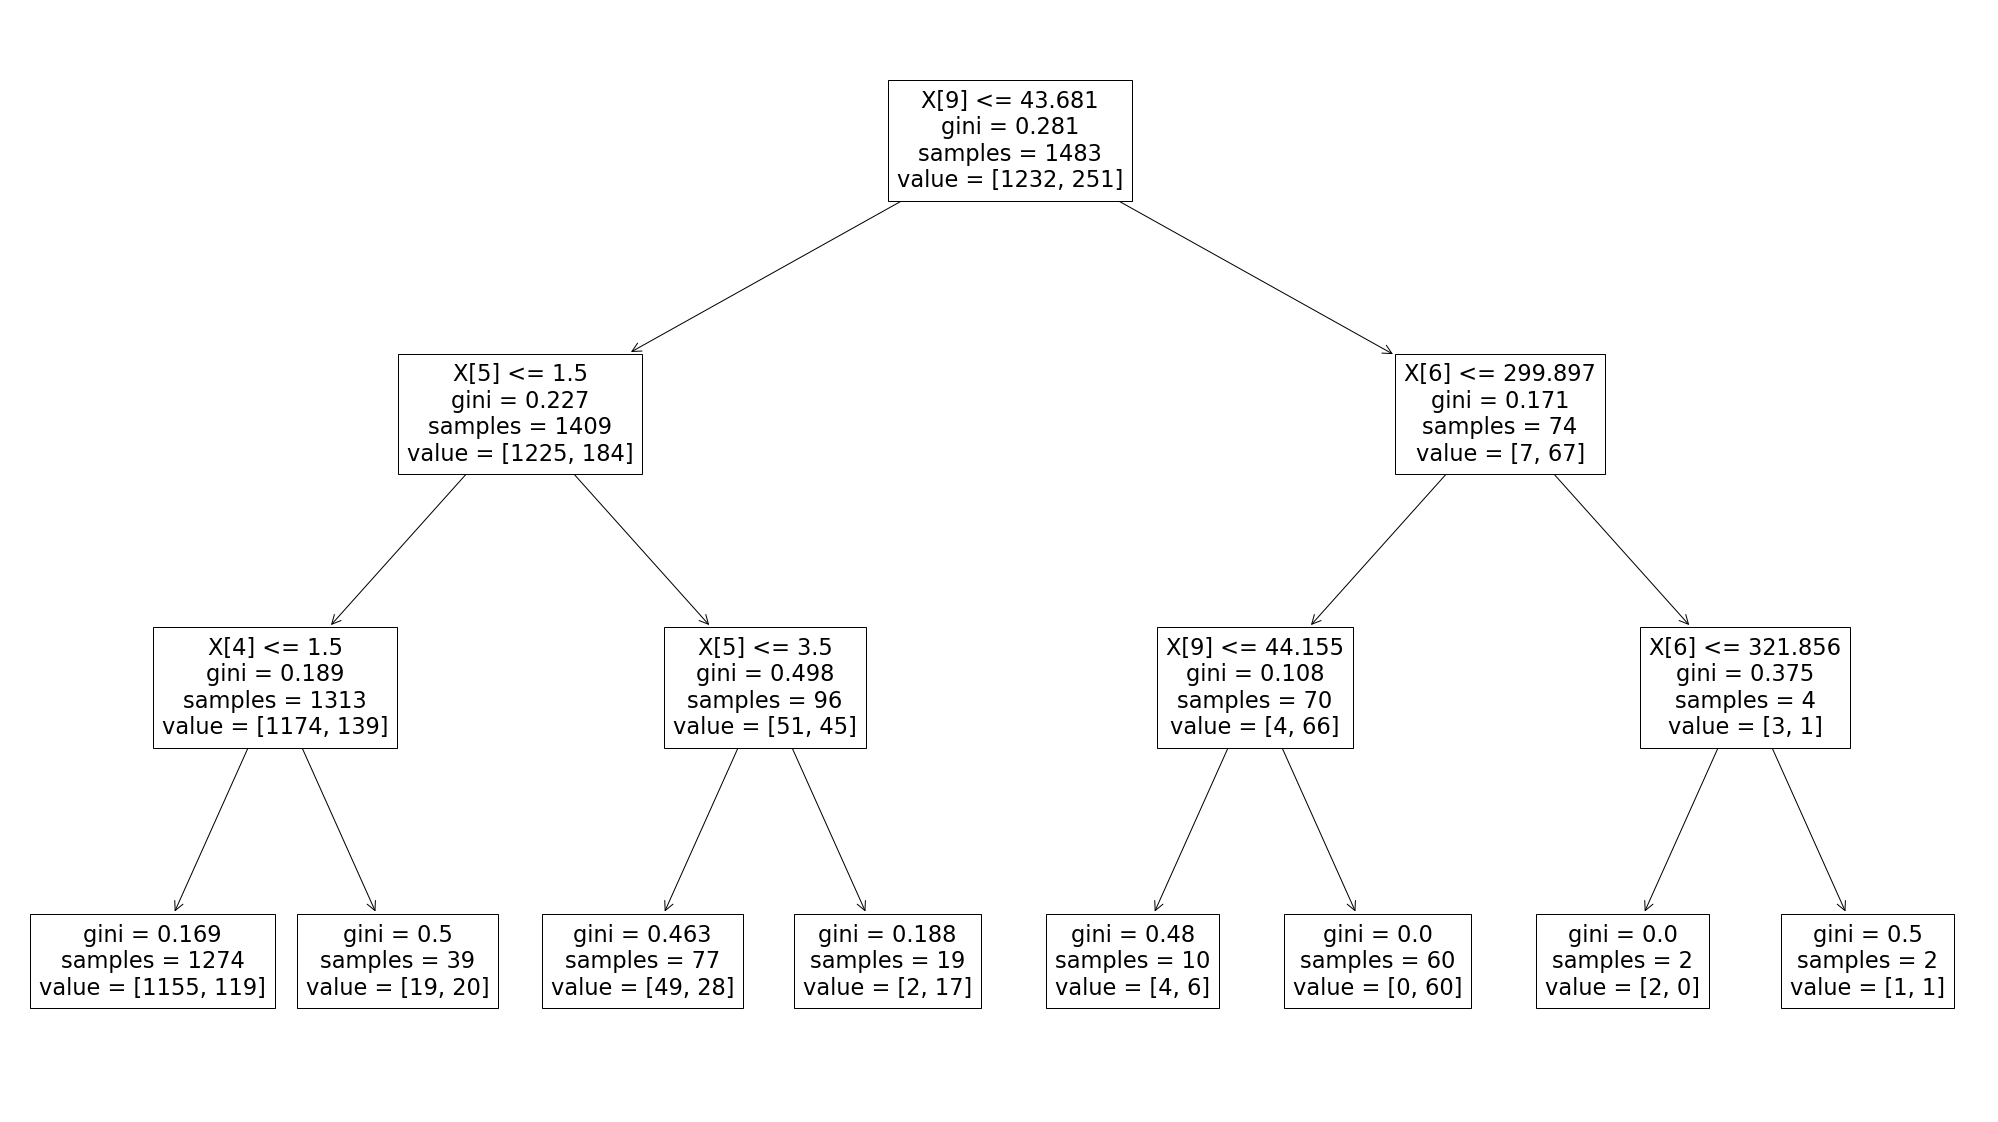

In [27]:
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

fig=plt.figure(figsize=(35,20))

plot_tree(best_model2);